In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting

In [7]:
# Download the dataset from Kaggle at https://www.kaggle.com/bcyphers/pitchfork-reviews/download
# Extract the zip and retrieve "reviews.csv"

In [8]:
raw_data = pd.read_csv("C:/Users/Home/Downloads/reviews.csv/reviews.csv")
raw_data.head()

,reviewid,Unnamed: 0,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid.1,content,genre,label,artist
0,22703,0,mezzanine,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,22703,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,massive attack
1,22721,1,prelapsarian,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,22721,"Eight years, five albums, and two EPs in, the ...",metal,hathenter,krallice
2,22659,2,all of them naturals,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,22659,Minneapolis’ Uranium Club seem to revel in bei...,rock,static shock,uranium club
3,22661,4,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,22661,Kleenex began with a crash. It transpired one ...,rock,kill rock stars,"kleenex, liliput"
4,22725,8,new start,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017,22725,It is impossible to consider a given release b...,electronic,teklife,taso


In [9]:
raw_data['author'] = raw_data['author'].astype(str)
raw_data.dtypes

reviewid            int64
Unnamed: 0          int64
title              object
url                object
score             float64
best_new_music      int64
author             object
author_type        object
pub_date           object
pub_weekday         int64
pub_day             int64
pub_month           int64
pub_year            int64
reviewid.1          int64
content            object
genre              object
label              object
artist             object
dtype: object

In [10]:
strings = raw_data['author'].value_counts()[:52].index # 52 authors over 100 reviews or more
author_names = []
for x in strings:
    author_names.append(x)

In [11]:
pd.isnull(raw_data).sum() # Check for null values in dataset

reviewid             0
Unnamed: 0           0
title                2
url                  0
score                0
best_new_music       0
author               0
author_type       3904
pub_date             0
pub_weekday          0
pub_day              0
pub_month            0
pub_year             0
reviewid.1           0
content             10
genre             2364
label               47
artist               2
dtype: int64

In [12]:
raw_data['author'].value_counts(normalize = True)[:52].sum() # percentage of all reviews

0.6833260822275397

In [13]:
(raw_data['author'].value_counts() >= 100).sum() # proves how many authors have over 100 reviews or more

52

In [14]:
author_less = []
strings = raw_data['author'].value_counts()[52:].index
for x in strings:
    author_less.append(x)
(author_less)

['aaron leitko',
 'brent dicrescenzo',
 'zach baron',
 'tim finney',
 'ryan schreiber',
 'rebecca raber',
 'jonah bromwich',
 'david bevan',
 'matthew perpetua',
 'zoe camp',
 'brad haywood',
 "andy o'connor",
 'david drake',
 'jason nickey',
 'cory d. byrom',
 'christopher dare',
 'kim kelly',
 'sean fennessey',
 'jordan sargent',
 'seth colter walls',
 'cameron macdonald',
 'andrew ryce',
 'sheldon pearce',
 'steven hyden',
 'saby reyes-kulkarni',
 'amy granzin',
 'rollie pemberton',
 'craig jenkins',
 'liz colville',
 'evan rytlewski',
 'katherine st. asaph',
 'david m. pecoraro',
 'kevin lozano',
 'johnny loftus',
 'cosmo lee',
 'jonathan zwickel',
 'alison fields',
 'ryan kearney',
 'martin douglas',
 'sam chennault',
 'roque strew',
 'winston cook-wilson',
 'marcus j. moore',
 'alex linhardt',
 'jamieson cox',
 'tom ewing',
 'jenn pelly',
 'peter macia',
 'jeremy gordon',
 'jessica suarez',
 'hari ashurst',
 'julianne escobedo shepherd',
 'andy battaglia',
 'meaghan garvey',
 'mi

In [15]:
# get the indices of the authors with >= 100 reviews, needed for data cleaning
keep_indices = []
increment = -1
for i in raw_data['author']: # iterate through the author column of the dataframe
    increment += 1 # increase when the iteration for the row has been complete to check if the author is in the list
    for j in range(len(author_names)): # iterate through the names with >= 100 reviews
        if i == author_names[j]: # check if they are the same
           keep_indices.append(increment) # append the indice
print(keep_indices, end = ' ')

[0, 7, 8, 9, 10, 16, 24, 25, 27, 36, 37, 41, 47, 52, 53, 54, 56, 58, 66, 68, 73, 76, 78, 87, 89, 90, 93, 96, 99, 104, 107, 111, 114, 116, 117, 119, 125, 128, 135, 137, 148, 153, 162, 163, 169, 176, 184, 189, 194, 196, 198, 203, 204, 205, 209, 213, 217, 218, 223, 225, 226, 227, 228, 232, 241, 246, 253, 256, 260, 263, 265, 269, 272, 274, 279, 286, 287, 289, 290, 292, 293, 294, 297, 303, 308, 309, 310, 311, 316, 322, 324, 326, 328, 332, 337, 344, 347, 348, 351, 353, 355, 363, 367, 368, 369, 370, 373, 375, 376, 378, 381, 387, 395, 397, 398, 403, 405, 414, 415, 418, 425, 426, 429, 431, 435, 443, 446, 448, 453, 455, 456, 459, 460, 462, 476, 477, 479, 481, 482, 489, 498, 499, 501, 504, 515, 517, 518, 522, 523, 524, 531, 534, 540, 541, 543, 547, 549, 554, 560, 563, 574, 578, 579, 580, 581, 582, 584, 586, 587, 593, 594, 595, 597, 601, 608, 611, 612, 616, 622, 625, 631, 635, 636, 640, 641, 647, 648, 649, 651, 654, 664, 665, 669, 670, 673, 677, 680, 681, 682, 686, 687, 692, 694, 697, 699, 701, 70

In [16]:
# compare if the amonut of reviews is the same as the authors total reviews with >= 100 
print(len(keep_indices))
print(raw_data['author'].value_counts()[:52].sum())

12565
12565


In [17]:
# get the indices we want to drop
remove_indices = []
increment = -1
for i in raw_data['author']:
    increment += 1
    for j in range(len(author_less)):
        if i == author_less[j]:
            remove_indices.append(increment)
print(remove_indices)

[1, 2, 3, 4, 5, 6, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 26, 28, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 42, 43, 44, 45, 46, 48, 49, 50, 51, 55, 57, 59, 60, 61, 62, 63, 64, 65, 67, 69, 70, 71, 72, 74, 75, 77, 79, 80, 81, 82, 83, 84, 85, 86, 88, 91, 92, 94, 95, 97, 98, 100, 101, 102, 103, 105, 106, 108, 109, 110, 112, 113, 115, 118, 120, 121, 122, 123, 124, 126, 127, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 190, 191, 192, 193, 195, 197, 199, 200, 201, 202, 206, 207, 208, 210, 211, 212, 214, 215, 216, 219, 220, 221, 222, 224, 229, 230, 231, 233, 234, 235, 236, 237, 238, 239, 240, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 254, 255, 257, 258, 259, 261, 262, 264, 266, 267, 268, 270, 271, 273, 275, 276, 277, 278, 280, 281, 282, 283, 284, 285, 288, 291, 295, 296, 2

In [18]:
# compare if the amonut of reviews is the same as the authors total reviews with >= 100 
print(len(remove_indices))
print(raw_data['author'].value_counts()[52:].sum())

5823
5823


In [19]:
subdata = raw_data.drop(remove_indices)
subdata['author'].value_counts() # check if the <= 100 reviews have been removed

joe tangari             815
stephen m. deusner      725
ian cohen               699
brian howe              500
mark richardson         476
stuart berman           445
marc hogan              439
nate patrin             347
marc masters            312
jayson greene           299
grayson currin          289
brandon stosuy          287
matthew murphy          274
dominique leone         273
jess harvell            273
andrew gaerig           270
rob mitchum             267
jason crock             267
andy beta               249
paul thompson           222
joshua klein            217
larry fitzmaurice       217
chris dahlen            214
nick neyland            211
philip sherburne        209
adam moerder            209
tom breihan             208
amanda petrusich        200
matt lemay              196
ryan dombal             174
mike powell             160
david raposa            155
zach kelly              153
sam ubl                 152
nitsuh abebe            144
eric harvey         

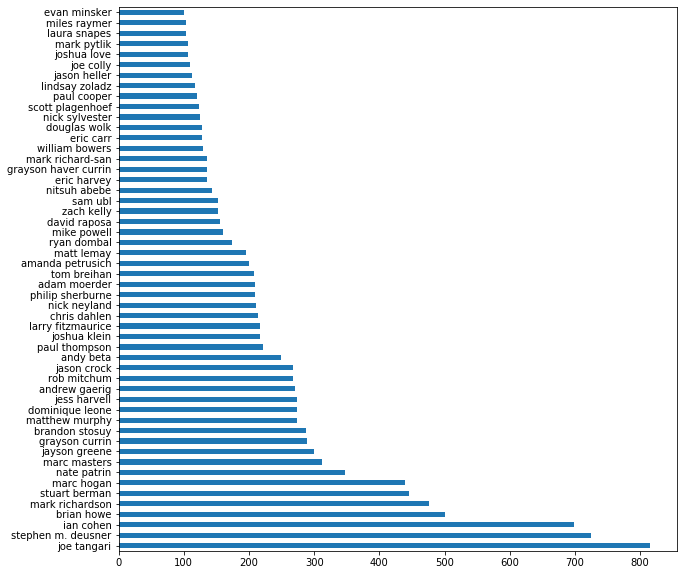

In [22]:
plt.figure(figsize = (10,10))
subdata['author'].value_counts().plot(kind='barh')